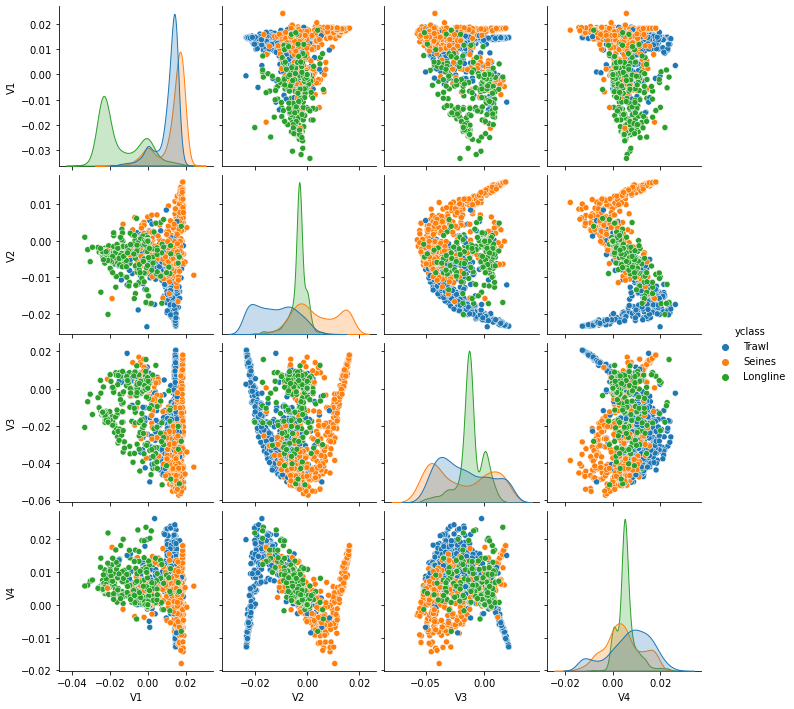

In [8]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("../Data/ExampleFishingHistTest.csv") 

# Preview the first 5 lines of the loaded data 
data.head()

# Seaborn visualization library
sns.pairplot(data, hue="yclass")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=1.0, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [9]:
# Set X and Y
X = data.iloc[:,0:4]
y = data.iloc[:,4]

# preprocess dataset, split into training and test part
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

scores = {}

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    scores[name] = clf.score(X_test, y_test)

scores

{'Nearest Neighbors': 0.8129496402877698,
 'Linear SVM': 0.7913669064748201,
 'RBF SVM': 0.815347721822542,
 'Gaussian Process': 0.815347721822542,
 'Decision Tree': 0.7889688249400479,
 'Random Forest': 0.7985611510791367,
 'Neural Net': 0.8225419664268585,
 'AdaBoost': 0.7817745803357314,
 'Naive Bayes': 0.7793764988009593,
 'QDA': 0.7961630695443646}